In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import float32
from matplotlib.pyplot import xticks
from matplotlib import pyplot as plt

TodasEstaciones = pd.read_csv('Est1_Est2_Est3.csv',index_col=0,parse_dates=True)
TodasEstaciones.head()

,Est1,Est2,Est3
Fecha,,,
2014-07-25,0.0,NaN,0.0
2014-07-26,0.6,NaN,0.0
2014-07-27,0.0,NaN,0.0
2014-07-28,0.0,NaN,0.0
2014-07-29,0.2,NaN,0.2


(array([16375, 16405, 16436, 16467, 16495, 16525]),
 [Text(16375, 0, 'Nov'),
  Text(16405, 0, 'Dec'),
  Text(16436, 0, 'Jan\n2015'),
  Text(16467, 0, 'Feb'),
  Text(16495, 0, 'Mar'),
  Text(16525, 0, '')])

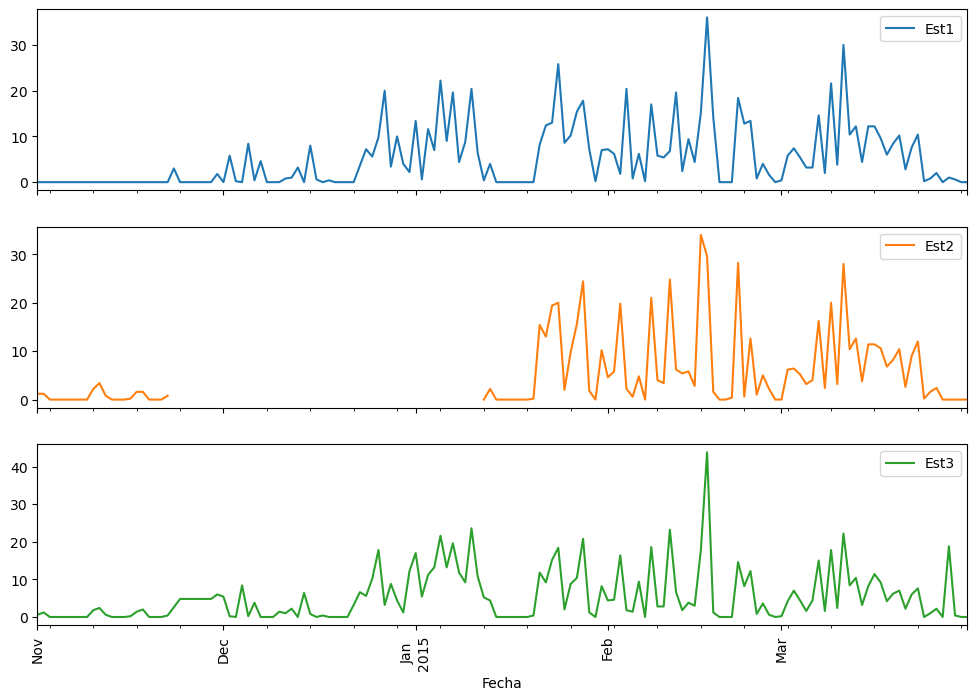

In [21]:


TodasEstaciones.loc['2014-11-01':'2015-03-31'].plot(subplots=True, figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')

In [22]:
import datetime
#we create a date column to extract the week number
TodasEstaciones['date']=TodasEstaciones.index
#apply a lambda function to the whole panda dataframe column
TodasEstaciones['week'] = TodasEstaciones['date'].apply(lambda x: x.isocalendar()[1])
#drop the date column because we dont need it
del TodasEstaciones['date']
#let see our dataframe
TodasEstaciones.head()

,Est1,Est2,Est3,week
Fecha,,,,
2014-07-25,0.0,NaN,0.0,30
2014-07-26,0.6,NaN,0.0,30
2014-07-27,0.0,NaN,0.0,30
2014-07-28,0.0,NaN,0.0,31
2014-07-29,0.2,NaN,0.2,31


<Axes: >

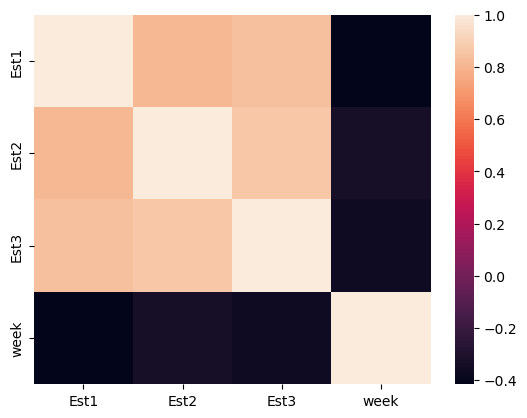

In [23]:
#creation of a correlation plot with seaborn
import seaborn as sns
corr = TodasEstaciones.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [24]:
#Definition of training sets

X_train = TodasEstaciones.loc['2015-01-20':'2015-03-27',['Est1','Est3','week']].astype(float32).values#,'week']] # Est 1, 3 and #week
y_train = TodasEstaciones.loc['2015-01-20':'2015-03-27','Est2'].astype(float32).values # Est 2

In [25]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

In [26]:
X_train[:20]

array([[-1.1105729 , -0.8753985 , -1.5966358 ],
       [-0.02605683,  0.60715   , -1.5966358 ],
       [ 0.529427  ,  0.2690249 , -1.5966358 ],
       [ 0.6087819 ,  1.0493137 , -1.5966358 ],
       [ 2.301685  ,  1.4654676 , -1.5966358 ],
       [ 0.02684647, -0.6673215 , -1.5966358 ],
       [ 0.2384593 ,  0.21700568, -1.236452  ],
       [ 0.9262012 ,  0.42508262, -1.236452  ],
       [ 1.2436206 ,  1.777583  , -1.236452  ],
       [-0.1583149 , -0.77136   , -1.236452  ],
       [-1.0841213 , -0.92741776, -1.236452  ],
       [-0.18476649,  0.13897677, -1.236452  ],
       [-0.1583149 , -0.355206  , -1.236452  ],
       [-0.29057297, -0.32919642, -0.8762681 ],
       [-0.87250847,  1.2053714 , -0.8762681 ],
       [ 1.5874916 , -0.6933311 , -0.8762681 ],
       [-1.0047665 , -0.74535036, -0.8762681 ],
       [-0.29057297,  0.2950345 , -0.8762681 ],
       [-1.0841213 , -0.92741776, -0.8762681 ],
       [ 1.1378143 ,  1.4914773 , -0.8762681 ]], dtype=float32)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()

model.add(Dense(12, activation='linear', input_shape=(3,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                48        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=200,verbose=0)

In [29]:
y_pred = model.predict(X_train)
y_pred[:10]

3/3 [==============================] - 0s 1ms/step


array([[ 1.178452 ],
       [12.047715 ],
       [10.919452 ],
       [15.813307 ],
       [21.200321 ],
       [ 4.361488 ],
       [10.10494  ],
       [12.531432 ],
       [21.31673  ],
       [ 3.4076295]], dtype=float32)

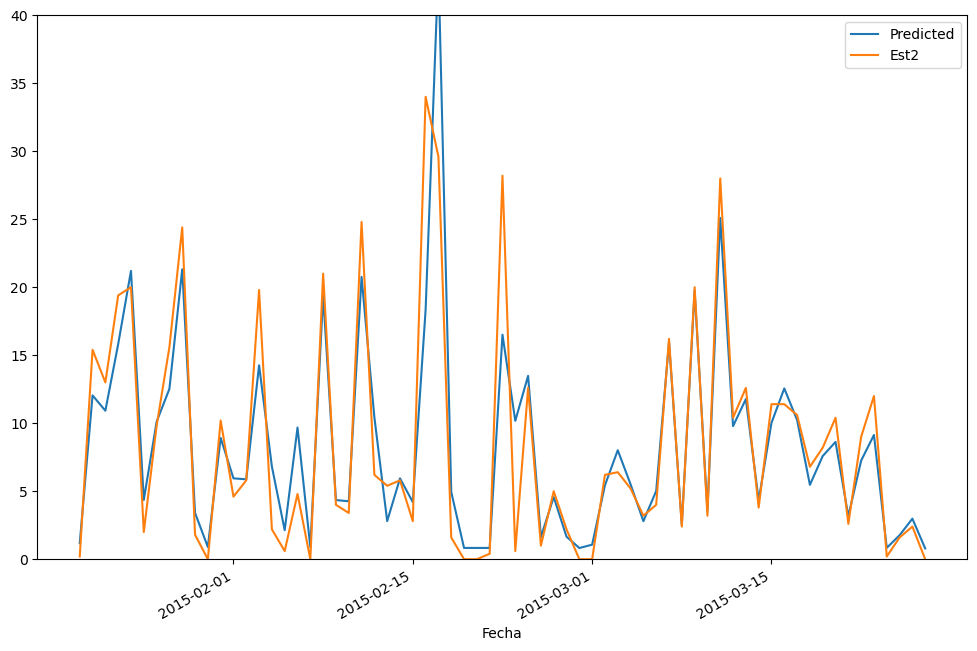

In [30]:
import matplotlib.pyplot as plt

# Plot predicted data
plt.plot(TodasEstaciones.loc['2015-01-20':'2015-03-27'].index, y_pred, label='Predicted')

# Plot actual data from 'Est2' column
TodasEstaciones['Est2'].loc['2015-01-20':'2015-03-27'].plot()

# Set figure size
plt.gcf().set_size_inches(12, 8)

# Set y-axis limit
plt.ylim(0, 40)

# Show legend and plot
plt.legend(loc='best')
plt.show()


# Predict the missing data in between 2014-11-23:2015-01-11¶

In [31]:
#Get the prediction for the train set
X_missing = TodasEstaciones.loc['2014-11-23':'2015-01-11',['Est1','Est3','week']].astype(float32).values

In [32]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_missing)

# Scale the train set
X_missing = scaler.transform(X_missing)

In [33]:
y_missing = model.predict(X_missing)
y_missing = y_missing.reshape([50]).tolist()

2/2 [==============================] - 0s 1ms/step


In [34]:
TodasEstaciones['Est2_Completed']=TodasEstaciones['Est2']
TodasEstaciones['Est2_Completed'].loc['2014-11-23':'2015-01-11']=y_missing

/var/folders/5s/9_6xffgn1ps_ynf4d93zm6800000gn/T/ipykernel_3232/3513055836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TodasEstaciones['Est2_Completed'].loc['2014-11-23':'2015-01-11']=y_missing


(0.0, 50.0)

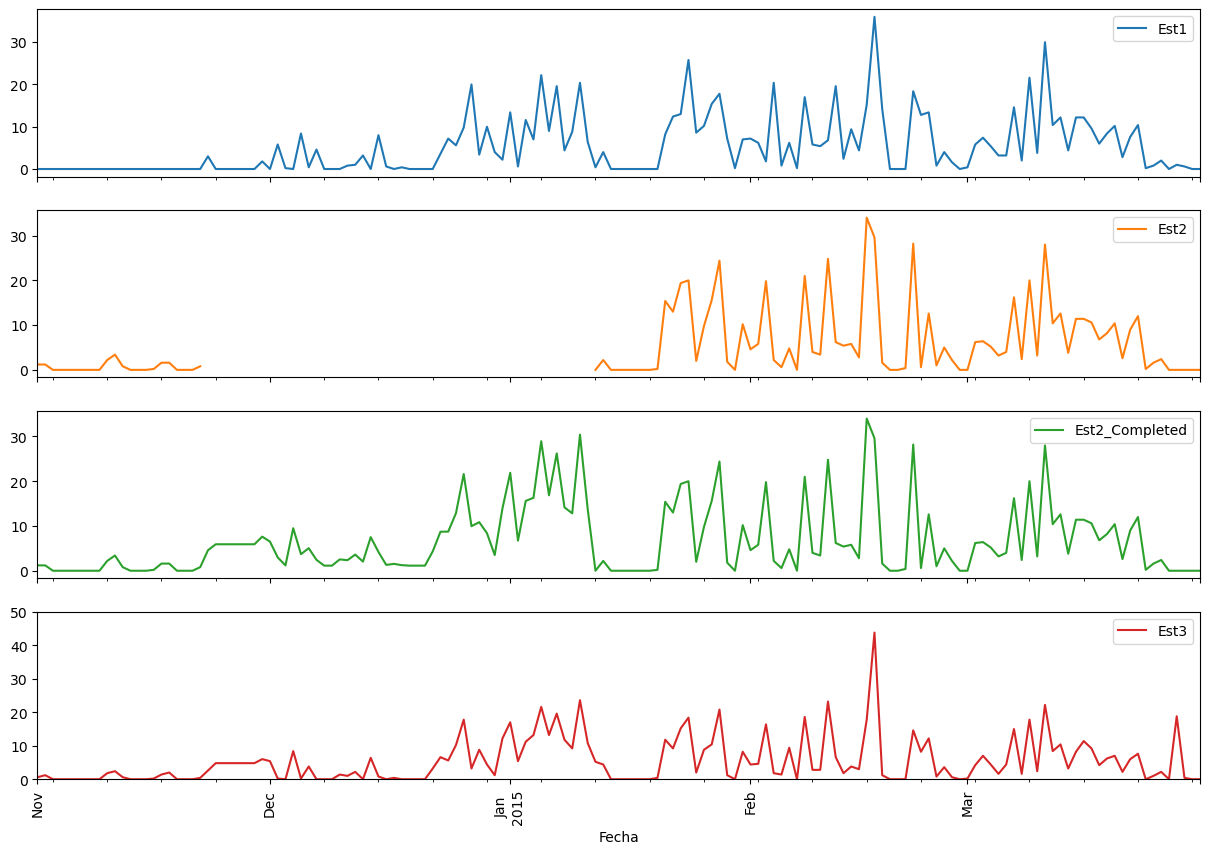

In [35]:
from matplotlib import pyplot as plt


TodasEstaciones.loc['2014-11-01':'2015-03-31',['Est1','Est2','Est2_Completed','Est3']].plot(subplots=True, 
                                                   figsize=(15, 10)); plt.legend(loc='best')
xticks(rotation='vertical')
plt.ylim(0,50)